Data is scraped from: https://maoyan.com/board/4

Overall structure of data scraping:
1. Get all ranking pages contents as soup;
2. Get all movie links from ranking pages as a list;
3. Get all movie pages from links as soup;
4. Save ranking pages and movie pages as .txt for further collection;
5. Collect demanded data.


Attention:
The anti-spider of this website is strong and I deal with this with user-agents and ip proxies. However, smooth 
and repeated access is not guaranteed. If the outputs keep saying 'attemp again', please refresh the web page and complete the verification on the url (or href of movie, actors, directors and so on) manually if demanded.

Author:
Yeheng Ma
1822070

'''
Data Scrape
'''

In [1]:
# import packages that would be used
import pandas
from bs4 import BeautifulSoup
import requests
import random
import os
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
'''
Before scraping, I need to deal with the anti-spider with user-agents and ip proxies.
'''
# generate user-agents pool
def generate_user_agents():
    User_Agent_Pool = [
        'Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19',
        'Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
        'Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1',
        'Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0',
        'Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0',
        'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36',
        'Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19',
        'Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3',
        'Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
    ]
    print('_______________User agents created____________________')
    return User_Agent_Pool


# generate ip proxies pool
def generate_ip_proxies():
    User_Agent_Pool = generate_user_agents()
    for i in range(0, 71):
        DataFrame([x.td.text.strip() for x in BeautifulSoup(
            requests.get('https://www.89ip.cn/index_' + str(i) + '.html',
                         headers={'User-Agent': random.choice(User_Agent_Pool)}).content, 'html.parser').find('table',
                                                                                                              class_='layui-table').tbody.findAll(
            'tr')]).to_csv('IP_proxy.csv', mode='a')
        print('IP proxy pool generating: ' + str(i / 71 * 100) + '%')
    data = list(pandas.read_csv('IP_proxy.csv')['0'])
    IP_Proxy = [data[i] for i in range(len(data)) if data[i] != '0']
    print('_______________IP_Proxy collected____________________')
    return IP_Proxy


User_Agent_Pool = generate_user_agents()
IP_Proxy = generate_ip_proxies()

_______________User agents created____________________
_______________User agents created____________________
IP proxy pool generating: 0.0%
IP proxy pool generating: 1.4084507042253522%
IP proxy pool generating: 2.8169014084507045%
IP proxy pool generating: 4.225352112676056%
IP proxy pool generating: 5.633802816901409%
IP proxy pool generating: 7.042253521126761%
IP proxy pool generating: 8.450704225352112%
IP proxy pool generating: 9.859154929577464%
IP proxy pool generating: 11.267605633802818%
IP proxy pool generating: 12.676056338028168%
IP proxy pool generating: 14.084507042253522%
IP proxy pool generating: 15.492957746478872%
IP proxy pool generating: 16.901408450704224%
IP proxy pool generating: 18.30985915492958%
IP proxy pool generating: 19.718309859154928%
IP proxy pool generating: 21.12676056338028%
IP proxy pool generating: 22.535211267605636%
IP proxy pool generating: 23.943661971830984%
IP proxy pool generating: 25.352112676056336%
IP proxy pool generating: 26.760563380

In [6]:
'''
Step1: Get all ranking pages contents as soup.
'''
# get one page of rankings
def get_rank_page(url):
    ua_chosen = random.choice(User_Agent_Pool)
    header = {
        'User-Agent': ua_chosen
    }
    ip_chosen = 'https://' + random.choice(IP_Proxy)
    res = requests.get(url, headers=header, proxies={'http': ip_chosen})
    print('___ip chosen:' + ip_chosen)
    print('___ua chosen:' + ua_chosen)
    soup = BeautifulSoup(res.content, 'html.parser')
    while soup.find('title').text != 'TOP100榜 - 猫眼电影 - 一网打尽好电影':
        print('+++++++++not target page, attempt again+++++++++')
        print()
        print()
        ua_chosen = random.choice(User_Agent_Pool)
        header = {
            'User-Agent': ua_chosen
        }
        ip_chosen = 'https://' + random.choice(IP_Proxy)
        res = requests.get(url, headers=header, proxies={'http': ip_chosen})
        soup = BeautifulSoup(res.content, 'html.parser')
        print('___ip chosen:' + ip_chosen)
        print('___ua chosen:' + ua_chosen)
        continue
    return soup


# get 10 pages of rankings
def get_rank_page_list(url_offset):
    rank_page_list = []
    for i in range(0, 100, 10):
        temp = get_rank_page(url_offset + str(i))
        a = 1
        while temp.find('title').text == '猫眼验证中心':
            print('======sorry...======no data scraped, attempting again....======')
            print()
            temp = get_rank_page(url_offset + str(i))
            a = a + 1
            continue
        rank_page_list.append(temp)
        print(str((i + 10) / 10) + ' pages done*********')
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print()
        print()

    print('---------rank page list collected----------')
    print('--------')
    print('--------')
    print()
    print()
    return rank_page_list

rank_page_list = get_rank_page_list('https://maoyan.com/board/4?offset=')

temp_page = []
for i in rank_page_list:
    temp_page.append(str(i))

os.makedirs('Rank pages')
for i in range(len(temp_page)):
    file = open('Rank pages/' + str(i + 1) + '.txt', 'a')
    file.write(temp_page[i])
    print(str(i + 1) + ' page(s) documented')

___ip chosen:https://60.168.206.158
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
1.0 pages done*********
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


___ip chosen:https://27.19.183.110
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++


___ip chosen:https://49.70.48.200
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
2.0 pages done*********
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


___ip chosen:https://60.168.80.250
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
3.0 pages done*********
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [7]:
'''
Step2: Get all movie links from ranking pages as a list.
'''
# get 10 movie grefs from one page
def get_movie_page(url, soup_rank):
    urls_movies = [x.a.get('href') for x in soup_rank.findAll('dd')]
    urls = []
    for i in range(len(urls_movies)):
        urls.append(url.strip('/board/4') + urls_movies[i])
    return urls


# get 100 movie hrefs
def get_movie_hrefs(url):
    movie_href_list = []
    for i in range(len(rank_page_list)):
        if rank_page_list[i].find('title').text != '猫眼验证中心':
            temp = get_movie_page(url, rank_page_list[i])
            a = 1
            while temp == []:
                print('======sorry...========' + str(
                    a) + 'attempts done' + '=====no data scraped, attempting again....=====')
                print('!!!!!!!!!!!!!!something is wrong at ' + str(i) + '!!!!!!!!!!!!!!!!!')
                print(rank_page_list[i].contents)
                a = a + 1
                continue
            movie_href_list.append(temp)
            print(str(i) + 'pages done :********great and keep going!**********')
            print()
            print()
        else:
            print('page load error, return to get_rank_page')
            print()

    num_of_hrefs = []
    for i in movie_href_list:
        num_of_hrefs.append(len(i))

    print('====movie href list:====')
    print(movie_href_list)
    print('---------movie hrefs collected----------' + 'containing ' + str(sum(num_of_hrefs)) + ' hrefs')
    print('--------')
    print('--------')
    print()
    print()
    return movie_href_list

href_list = get_movie_hrefs('https://maoyan.com/board/4')

0pages done :********great and keep going!**********


1pages done :********great and keep going!**********


2pages done :********great and keep going!**********


3pages done :********great and keep going!**********


4pages done :********great and keep going!**********


5pages done :********great and keep going!**********


6pages done :********great and keep going!**********


7pages done :********great and keep going!**********


8pages done :********great and keep going!**********


9pages done :********great and keep going!**********


====movie href list:====
[['https://maoyan.com/films/1200486', 'https://maoyan.com/films/1297', 'https://maoyan.com/films/1206605', 'https://maoyan.com/films/1292', 'https://maoyan.com/films/1211270', 'https://maoyan.com/films/1203', 'https://maoyan.com/films/1216365', 'https://maoyan.com/films/1303', 'https://maoyan.com/films/4055', 'https://maoyan.com/films/46818'], ['https://maoyan.com/films/416', 'https://maoyan.com/films/1633', 'https://maoy

In [8]:
'''
Step3: Get all movie pages from links as soup.
'''
# get 100 movie page contents
def get_movie_details():
    movie_info_soup_list = []
    for group in range(len(href_list)):
        for i in range(len(href_list[group])):
            ua_chosen = random.choice(User_Agent_Pool)
            header = {
                'User-Agent': ua_chosen
            }
            ip_chosen = 'https://' + random.choice(IP_Proxy)
            print('___ip chosen:' + ip_chosen)
            print('___ua chosen:' + ua_chosen)
            res = requests.get(href_list[group][i], headers=header, proxies={'http': ip_chosen})
            soup = BeautifulSoup(res.content, 'html.parser')

            while '_购票_剧情介绍_演职人员_图集_猫眼电影' not in soup.find('title').text:
                print('+++++++++not target page, attempt again+++++++++')
                ua_chosen = random.choice(User_Agent_Pool)
                header = {
                    'User-Agent': ua_chosen
                }
                ip_chosen = 'https://' + random.choice(IP_Proxy)
                print('___ip chosen:' + ip_chosen)
                print('___ua chosen:' + ua_chosen)
                res = requests.get(href_list[group][i], headers=header, proxies={'http': ip_chosen})
                soup = BeautifulSoup(res.content, 'html.parser')
                continue

            movie_info_soup_list.append(soup)
            print(str(group * 10 + (i + 1)) + 'movie pages downloaded')
            print('==================')
            print()

    return movie_info_soup_list


movie_details = get_movie_details()
temp_movie = []
for i in movie_details:
    temp_movie.append(str(i))
os.makedirs('Movie details')
for i in range(len(temp_movie)):
    file = open('Movie details/' + str(i + 1) + '.txt', 'a')
    file.write(temp_movie[i])
    print(str(i + 1) + ' movies documented')

___ip chosen:https://140.249.48.241
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.207.24
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://118.190.42.97
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
1movie pages downloaded

___ip chosen:https://60.168.207.247
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
2movie pages downloaded

___ip chosen:https://60.168.207.5
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
3movie pages downloaded

25movie pages downloaded

___ip chosen:https://59.55.166.87
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://125.73.209.106
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
26movie pages downloaded

___ip chosen:https://27.191.60.28
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.167.20.216
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.80.80
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A10

+++++++++not target page, attempt again+++++++++
___ip chosen:https://61.161.30.14
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.176.69.174
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.207.28
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://115.223.7.35
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.217.152.197
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 

+++++++++not target page, attempt again+++++++++
___ip chosen:https://47.107.211.198
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
67movie pages downloaded

___ip chosen:https://60.167.23.181
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.167.113.57
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
68movie pages downloaded

___ip chosen:https://61.161.30.104
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
69movie pages downloaded

___ip chosen:https://60.169.114.141
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) Apple

+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.206.242
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.191.60.147
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.207.51
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.169.133.191
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
93movie pages downloaded

___ip chosen:https://27.191.60.82
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 B

In [9]:
'''
Step4: Get all director links
'''
def get_direc_link():
    direc_link = []
    for i in range(len(movie_details)):
        temp = movie_details[i].findAll('div', class_='celebrity-group')
        temp = [temp[k] for k in range(len(temp)) if temp[k].div.span != None]
        type_list = [x.div.text.strip() for x in temp]
        for j in range(len(type_list)):
            if type_list[j].startswith('导演'):
                link = ['https://www.maoyan.com' + x.div.a.get('href') for x in temp[j].ul.findAll('li')]
                direc_link.append(link)
                print(link)
        print('director link collection: ' + str(i / len(movie_details) * 100 + 1) + '%')
        print()
    print('---director link collection done---')
    return direc_link

direc_link = get_direc_link()

['https://www.maoyan.com/films/celebrity/476574']
director link collection: 1.0%

['https://www.maoyan.com/films/celebrity/35629']
director link collection: 2.0%

['https://www.maoyan.com/films/celebrity/30716']
director link collection: 3.0%

['https://www.maoyan.com/films/celebrity/31443']
director link collection: 4.0%

['https://www.maoyan.com/films/celebrity/1029021']
director link collection: 5.0%

['https://www.maoyan.com/films/celebrity/8023']
director link collection: 6.0%

['https://www.maoyan.com/films/celebrity/30359']
director link collection: 7.0%

['https://www.maoyan.com/films/celebrity/7543']
director link collection: 8.0%

['https://www.maoyan.com/films/celebrity/30319']
director link collection: 9.0%

['https://www.maoyan.com/films/celebrity/1427']
director link collection: 10.0%

['https://www.maoyan.com/films/celebrity/28308']
director link collection: 11.0%

['https://www.maoyan.com/films/celebrity/30497']
director link collection: 12.0%

['https://www.maoyan.com/

In [10]:
'''
Step5: Get all actor links
'''
def get_actor_link():
    actor_link = []
    for i in range(len(movie_details)):
        temp = movie_details[i].findAll('div', class_='celebrity-group')
        temp = [temp[k] for k in range(len(temp)) if temp[k].div.span != None]
        type_list = [x.div.text for x in temp]
        for j in range(len(type_list)):
            if '演员' in type_list[j]:
                link = ['https://www.maoyan.com' + x.div.a.get('href') for x in temp[j].ul.findAll('li')]
                actor_link.append(link)
        print('actor link collection: ' + str(i / len(movie_details) * 100+1) + '%')
        print()
    print('---actor link collection done---')
    return actor_link

actor_link = get_actor_link()

actor link collection: 1.0%

actor link collection: 2.0%

actor link collection: 3.0%

actor link collection: 4.0%

actor link collection: 5.0%

actor link collection: 6.0%

actor link collection: 7.0%

actor link collection: 8.0%

actor link collection: 9.0%

actor link collection: 10.0%

actor link collection: 11.0%

actor link collection: 12.0%

actor link collection: 13.0%

actor link collection: 14.0%

actor link collection: 15.000000000000002%

actor link collection: 16.0%

actor link collection: 17.0%

actor link collection: 18.0%

actor link collection: 19.0%

actor link collection: 20.0%

actor link collection: 21.0%

actor link collection: 22.0%

actor link collection: 23.0%

actor link collection: 24.0%

actor link collection: 25.0%

actor link collection: 26.0%

actor link collection: 27.0%

actor link collection: 28.0%

actor link collection: 29.000000000000004%

actor link collection: 29.999999999999996%

actor link collection: 31.0%

actor link collection: 32.0%

actor l

In [11]:
'''
Step6: Get all director pages
'''
def get_director_details():
    director_info_soup_list = []
    for group in range(len(direc_link)):
        temp = []
        for i in range(len(direc_link[group])):
            ua_chosen = random.choice(User_Agent_Pool)
            header = {
                'User-Agent': ua_chosen
            }
            ip_chosen = 'https://' + random.choice(IP_Proxy)
            print('___ip chosen:' + ip_chosen)
            print('___ua chosen:' + ua_chosen)
            res = requests.get(direc_link[group][i], headers=header, proxies={'http': ip_chosen})
            soup = BeautifulSoup(res.content, 'html.parser')

            while '介绍_图片_作品-猫眼电影' not in soup.find('title').text:
                print('+++++++++not target page, attempt again+++++++++')
                ua_chosen = random.choice(User_Agent_Pool)
                header = {
                    'User-Agent': ua_chosen
                }
                ip_chosen = 'https://' + random.choice(IP_Proxy)
                print('___ip chosen:' + ip_chosen)
                print('___ua chosen:' + ua_chosen)
                res = requests.get(direc_link[group][i], headers=header, proxies={'http': ip_chosen})
                soup = BeautifulSoup(res.content, 'html.parser')
                continue
            temp.append(soup)
        director_info_soup_list.append(temp)
        print(str(group+1) + 'movie(s) director(s) details done')
        print('==================')
        print()
    return director_info_soup_list

director_details = get_director_details()
temp_direc = []
for i in director_details:
    temp_direc.append(str(i))
os.makedirs('Director details')
for i in range(len(temp_direc)):
    file = open('Director details/' + str(i + 1) + '.txt', 'a')
    file.write(temp_direc[i])
    print(str(i + 1) + ' movies documented')

___ip chosen:https://60.167.23.55
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
1movie(s) director(s) details done

___ip chosen:https://223.241.77.13
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
2movie(s) director(s) details done

___ip chosen:https://58.220.95.54
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
3movie(s) director(s) details done

___ip chosen:https://60.168.207.188
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
4movie(s) director(s) details done

___ip chosen:https://223.240.209.224
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
5movie(s) director(s) details done

___ip chosen:https://60.167.112.49
___ua chosen:Mozilla/5.0 

36movie(s) director(s) details done

___ip chosen:https://60.167.112.192
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
37movie(s) director(s) details done

___ip chosen:https://60.168.81.16
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
38movie(s) director(s) details done

___ip chosen:https://163.125.251.112
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
39movie(s) director(s) details done

___ip chosen:https://58.20.234.243
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
40movie(s) director(s) details done

___ip chosen:https://27.192.173.121
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHT

68movie(s) director(s) details done

___ip chosen:https://180.122.147.162
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
69movie(s) director(s) details done

___ip chosen:https://59.37.18.243
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
70movie(s) director(s) details done

___ip chosen:https://60.169.114.48
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
___ip chosen:https://45.115.175.112
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
71movie(s) director(s) details done

___ip chosen:https://60.167.21.246
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
72movie(s) director(s) details done

___ip chosen:https://27.150

In [12]:
'''
Step7: Get all actor pages
'''
def get_actor_details():
    actor_info_soup_list = []
    for group in range(len(actor_link)):
        temp = []
        for i in range(len(actor_link[group][:3])):
            ua_chosen = random.choice(User_Agent_Pool)
            header = {
                'User-Agent': ua_chosen
            }
            ip_chosen = 'https://' + random.choice(IP_Proxy)
            print('___ip chosen:' + ip_chosen)
            print('___ua chosen:' + ua_chosen)
            res = requests.get(actor_link[group][i], headers=header, proxies={'http': ip_chosen})
            soup = BeautifulSoup(res.content, 'html.parser')

            while '介绍_图片_作品-猫眼电影' not in soup.find('title').text:
                print('+++++++++not target page, attempt again+++++++++')
                ua_chosen = random.choice(User_Agent_Pool)
                header = {
                    'User-Agent': ua_chosen
                }
                ip_chosen = 'https://' + random.choice(IP_Proxy)
                print('___ip chosen:' + ip_chosen)
                print('___ua chosen:' + ua_chosen)
                res = requests.get(actor_link[group][i], headers=header, proxies={'http': ip_chosen})
                soup = BeautifulSoup(res.content, 'html.parser')
                continue
            temp.append(soup)
        actor_info_soup_list.append(temp)
        print(str(group+1) + 'movie(s) actors details done')
        print('==================')
        print()
    return actor_info_soup_list

actor_details = get_actor_details()
temp_act = []
for i in actor_details:
    temp_act.append(str(i))
os.makedirs('Actor details')
for i in range(len(temp_act)):
    file = open('Actor details/' + str(i + 1) + '.txt', 'a')
    file.write(temp_act[i])
    print(str(i + 1) + ' movies documented')

___ip chosen:https://60.168.206.246
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
___ip chosen:https://27.191.60.113
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
___ip chosen:https://220.175.168.46
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
1movie(s) actors details done

___ip chosen:https://60.167.82.95
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
___ip chosen:https://60.182.22.131
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
___ip chosen:https://60.168.80.148
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; 

___ip chosen:https://60.168.81.74
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
15movie(s) actors details done

___ip chosen:https://123.205.32.25
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 7 Build/JRO03D) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.166 Safari/535.19
___ip chosen:https://60.167.82.249
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
___ip chosen:https://60.174.197.23
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
16movie(s) actors details done

___ip chosen:https://60.169.94.78
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
___ip chosen:https://59.55.166.206
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build

30movie(s) actors details done

___ip chosen:https://27.159.188.101
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
___ip chosen:https://60.169.114.20
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
___ip chosen:https://49.89.86.208
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
31movie(s) actors details done

___ip chosen:https://182.84.144.163
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
___ip chosen:https://60.167.112.15
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
___ip chosen:https://49.51.188.22
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:1

+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.182.22.131
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://223.244.179.119
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.169.242.40
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.206.144
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.80.91
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+

+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.150.87.238
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.159.188.139
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.191.60.85
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.191.60.44
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
+++++++++not target page, attempt again+++++++++
___ip chosen:https://49.51.72.64
___ua chosen:Mozilla/5.0 (Linux; Android 4.1.1; Nexus 

+++++++++not target page, attempt again+++++++++
___ip chosen:https://58.220.95.107
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.167.113.0
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.182.199.46
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.182.38.73
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://27.191.60.254
___ua chosen:Mozilla/5.

+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.167.22.165
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://60.168.206.28
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
+++++++++not target page, attempt again+++++++++
___ip chosen:https://223.242.247.219
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
+++++++++not target page, attempt again+++++++++
___ip chosen:https://223.241.77.180
___ua chosen:Mozilla/5.0 (Linux; U; Android 4.0.4; en-gb; GT-I9300 Build/IMM76D) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30
+++++++++not target page, attempt again+++++++++
___ip chosen:https://140.249.48.241
_

___ip chosen:https://103.205.28.239
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
___ip chosen:https://183.56.210.236
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
39movie(s) actors details done

___ip chosen:https://58.22.177.73
___ua chosen:Mozilla/5.0 (Linux; U; Android 2.2; en-gb; GT-P1000 Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
___ip chosen:https://27.191.60.187
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
___ip chosen:https://58.255.206.195
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
40movie(s) actors details done

___ip chosen:https://122.51.207.244
___ua chosen:Mo

___ip chosen:https://58.255.206.195
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
54movie(s) actors details done

___ip chosen:https://60.176.68.53
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
___ip chosen:https://49.70.33.72
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
___ip chosen:https://47.93.249.75
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
55movie(s) actors details done

___ip chosen:https://111.3.116.49
___ua chosen:Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19
___ip chosen:https://60.169.115.233
___ua cho

___ip chosen:https://183.247.194.181
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
___ip chosen:https://60.167.20.71
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
70movie(s) actors details done

___ip chosen:https://60.168.207.202
___ua chosen:Mozilla/5.0 (iPod; U; CPU like Mac OS X; en) AppleWebKit/420.1 (KHTML, like Gecko) Version/3.0 Mobile/3A101a Safari/419.3
___ip chosen:https://60.185.205.209
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
___ip chosen:https://59.54.0.202
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
71movie(s) actors details done

___ip chosen:https://58.255.5.217
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
___ip chosen:https://60.173.35.103
___ua chosen:Mozil

___ip chosen:https://27.191.60.111
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
___ip chosen:https://117.161.75.82
___ua chosen:Mozilla/5.0 (iPad; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
85movie(s) actors details done

___ip chosen:https://223.240.208.75
___ua chosen:Mozilla/5.0 (Android; Mobile; rv:14.0) Gecko/14.0 Firefox/14.0
___ip chosen:https://60.167.133.30
___ua chosen:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36
___ip chosen:https://60.174.190.251
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64; rv:21.0) Gecko/20100101 Firefox/21.0
86movie(s) actors details done

___ip chosen:https://223.241.77.203
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
___ip chosen:https://60.168.81.2

___ip chosen:https://36.24.123.2
___ua chosen:Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.94 Safari/537.36
100movie(s) actors details done

1 movies documented
2 movies documented
3 movies documented
4 movies documented
5 movies documented
6 movies documented
7 movies documented
8 movies documented
9 movies documented
10 movies documented
11 movies documented
12 movies documented
13 movies documented
14 movies documented
15 movies documented
16 movies documented
17 movies documented
18 movies documented
19 movies documented
20 movies documented
21 movies documented
22 movies documented
23 movies documented
24 movies documented
25 movies documented
26 movies documented
27 movies documented
28 movies documented
29 movies documented
30 movies documented
31 movies documented
32 movies documented
33 movies documented
34 movies documented
35 movies documented
36 movies documented
37 movies documented
38 movies documented
39 movies documented
40

In [13]:
'''
Step8: Collect demanded data
'''
region_list = []
time_list = []
title_list = []
director_list = []
actor_list = []
rating_list = []
income_list = []
duration_list = []
class_list = []
number_of_work_director_avg = []
number_of_work_actor_avg = []

def list_to_string(list):
    new_str = ''
    for i in range(len(list)):
        if i < len(list)-1:
            new_str = new_str + list[i] + ', '
        else:
            new_str = new_str + list[i]
    return  new_str


for order in range(100):
    path = 'Movie details/' + str(order + 1) + '.txt'
    data = open(path).read()
    soup = BeautifulSoup(data, 'html.parser')

    Title = soup.find('h1', class_='name').text

    temp = soup.findAll('div', class_='celebrity-group')
    temp = [temp[i] for i in range(len(temp)) if temp[i].div.span != None]
    type_list = [x.div.text.strip() for x in temp]
    for i in range(len(type_list)):
        if type_list[i].startswith('导演'):
            Name_of_director = [x.div.a.text.strip() for x in temp[i].ul.findAll('li')]

    temp = soup.findAll('div', class_='celebrity-group')
    temp = [temp[i] for i in range(len(temp)) if temp[i].div.span != None]
    type_list = [x.div.text for x in temp]
    for j in range(len(type_list)):
        if '演员' in type_list[j]:
            Name_of_actors = [x.div.a.text.strip() for x in temp[j].ul.findAll('li')]


    temp_bottom = [x.text for x in soup.findAll('div', class_='mbox-name')]

    Cumulative_income = 'No data for now'
    for i in range(len(temp_bottom)):
        if '累计票房' in temp_bottom[i] and temp_bottom[i-1] != '暂无':
            Cumulative_income = str(int(temp_bottom[i - 1])*10)


    Duration = re.findall('\d+', [x.text for x in soup.findAll('li', class_='ellipsis')][1])[0]
    
    Region = [x.text.strip() for x in soup.findAll('li', class_='ellipsis')][1][:-8].strip()
    
    Time = re.search(r'\d{4}-\d{2}-\d{2}', [x.text.strip() for x in soup.findAll('li', class_='ellipsis')][2]).group(0)

    Type = [x.text.strip() for x in soup.findAll('a', class_='text-link')]

    title_list.append(Title)
    region_list.append(Region)
    time_list.append(Time)
    director_list.append(list_to_string(Name_of_director))
    actor_list.append(list_to_string(Name_of_actors))
    income_list.append(Cumulative_income)
    duration_list.append(Duration)
    class_list.append(list_to_string(Type))

for order in range(10):
    path = 'Rank pages/' + str(order + 1) + '.txt'
    data = open(path).read()
    soup = BeautifulSoup(data, 'html.parser')
    integers = [x.text for x in soup.findAll('i', class_='integer')]
    fractions = [y.text for y in soup.findAll('i', class_='fraction')]
    for i in range(len(integers)):
        rating_list.append(integers[i] + fractions[i])

for order in range(100):
    path = 'Director details/' + str(order + 1) + '.txt'
    data = open(path).read()
    soup = BeautifulSoup(data, 'html.parser')

    temp = [re.findall('\d+', x.div.div.span.text) for x in soup.findAll('div', class_='work')]
    temp_alt = [re.findall('\d+', x.text) for x in soup.findAll('h2', style='display:inline-block')]

    if '你想知道的都在这里' in data:
        num_temp = temp + temp_alt
        num_temp = [num_temp[i] for i in range(len(num_temp)) if num_temp[i] != []]
    else:
        num_temp = temp

    num_work_str = []
    for i in num_temp:
        num_work_str.append(list_to_string(i))

    num_work_sum = 0
    for i in num_work_str:
        num_work_sum = num_work_sum + int(i)

    num_work_avg = num_work_sum / len(num_work_str)
    number_of_work_director_avg.append(num_work_avg)


for order in range(100):
    path = 'Actor details/' + str(order + 1) + '.txt'
    data = open(path).read()
    soup = BeautifulSoup(data, 'html.parser')

    temp = [re.findall('\d+', x.div.div.span.text) for x in soup.findAll('div', class_='work')]
    temp_alt = [re.findall('\d+', x.text) for x in soup.findAll('h2', style='display:inline-block')]

    if '你想知道的都在这里' in data:
        num_temp = temp + temp_alt
        num_temp = [num_temp[i] for i in range(len(num_temp)) if num_temp[i] != []]
    else:
        num_temp = temp

    num_work_str = []
    for i in num_temp:
        num_work_str.append(list_to_string(i))

    num_work_sum = 0
    for i in num_work_str:
        num_work_sum = num_work_sum + int(i)

    num_work_avg = num_work_sum / len(num_work_str)
    number_of_work_actor_avg.append(num_work_avg)
        

data = DataFrame({
    'Title': title_list,
    'Region': region_list,
    'Time': time_list,
    'Name of director': director_list,
    'Name of actors': actor_list,
    'Average number of works of director(s)': number_of_work_director_avg,
    'Average number of works of actors': number_of_work_actor_avg,
    'Rating': rating_list,
    'Cumulative income/thousand RMB': income_list,
    'Duration/minutes': duration_list,
    'Type': class_list,

})
data.to_csv('Yeheng.Ma 1822070.csv', encoding='utf-8-sig')

'''
Data analysis
'''

In [14]:
# import data
df = pandas.read_csv('Yeheng.Ma 1822070.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df['Rating'] = df['Rating'].astype(float)
df.head()

,Title,Region,Time,Name of director,Name of actors,Average number of works of director(s),Average number of works of actors,Rating,Cumulative income/thousand RMB,Duration/minutes,Type
0,我不是药神,中国大陆,2018-07-05,文牧野,"徐峥, 周一围, 王传君, 谭卓, 章宇, 杨新鸣, 王砚辉, 贾晨飞, 王佳佳, 李乃文,...",25.0,108.333333,9.6,3100020,117,"剧情, 喜剧"
1,肖申克的救赎,美国,1994-09-13,弗兰克·德拉邦特,"蒂姆·罗宾斯, 摩根·弗里曼, 鲍勃·冈顿, 威廉·桑德勒, 克兰西·布朗, 吉尔·贝罗斯,...",121.0,293.666667,9.5,No data for now,142,"剧情, 犯罪"
2,绿皮书,美国,2019-03-01,彼得·法雷里,"维果·莫腾森, 马赫沙拉·阿里, 琳达·卡德里尼, 塞巴斯蒂安·马尼斯科, 迪米特·D·马里...",93.0,153.000000,9.5,478720,130,"剧情, 喜剧, 传记"
3,海上钢琴师,意大利,2019-11-15,朱塞佩·托纳多雷,"蒂姆·罗斯, 比尔·努恩, 克兰伦斯·威廉姆斯三世, 普路特·泰勒·文斯, 梅兰尼·蒂埃里,...",69.0,138.333333,9.3,143760,126,"剧情, 爱情, 音乐"
4,哪吒之魔童降世,中国大陆,2019-07-26,饺子,"吕艳婷, 囧森瑟夫, 瀚墨, 陈浩, 绿绮, 张珈铭, 杨卫, 李南, 任俊鹏, 何禹祥, ...",5.0,8.666667,9.6,5035700,110,"动画, 喜剧, 奇幻"


In [16]:
duration = df['Duration/minutes']  # duration

genre = df['Type'] # genre

genre_deduplicated = []
for i in list(genre):
    for j in i.split(','):
        if j.strip() not in genre_deduplicated:
            genre_deduplicated.append(j.strip())
            
def count_genre(genre_deduplicated, genre):
    count_genre = []
    for i in genre_deduplicated:
        count = 0
        for j in genre:
            if i in j:
                count += 1
        count_genre.append(count)

    res = pandas.DataFrame({'Genre': genre_deduplicated,
                        'Number': count_genre})

    return res.sort_values(by='Number', ascending=False)

count_genre = count_genre(genre_deduplicated, genre)  # the number of different genre elements

work_director = df['Average number of works of director(s)']  # average numeber of works of directors

work_actor = df['Average number of works of actors']  # average number of works of actors

time = df['Time']  # time of release
history = [2021 - int(i) for i in [j[:4] for j in time]]  # 2021 - (year of release)

def score_genre(genre_to_check):
    genre_score = 0
    for i in range(len(count_genre['Genre'])):
        if count_genre['Genre'][i] == genre_to_check:
            genre_score = int(count_genre['Number'][i] / sum(count_genre['Number']) * 1000)
    return genre_score


def get_scores():
    genre_score_list = []
    for i in genre:
        score_row = sum([score_genre(x.strip()) for x in i.split(',')])
        genre_score_list.append(score_row)
    return genre_score_list

genre_score_list = get_scores()  # convert genre list to a score based on frequency of elements

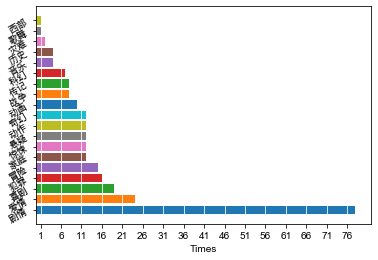

In [17]:
# plot genre
plt.barh(count_genre['Genre'], count_genre['Number'], color=sns.color_palette())
plt.yticks(rotation=30)
plt.xticks(range(int(min(count_genre['Number'])), int(max(count_genre['Number'])), 5))
plt.xlabel('Times')
plt.grid(axis='x', color='white', linestyle='-')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.show()

/opt/anaconda3/envs/INT303/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


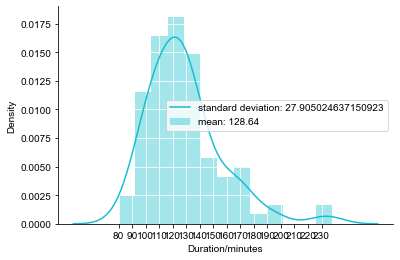

In [20]:
# plot duration
import numpy as np
sns.distplot(duration, color=sns.color_palette()[9])
sns.despine()
plt.xticks(range(min(duration), max(duration), 10))
plt.legend(['standard deviation: ' + str(np.std(duration)), 'mean: ' + str(np.mean(duration))])
plt.grid(axis='y', color='white', linestyle='-')
plt.grid(axis='x', color='white', linestyle='-')
plt.show()

/opt/anaconda3/envs/INT303/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/INT303/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


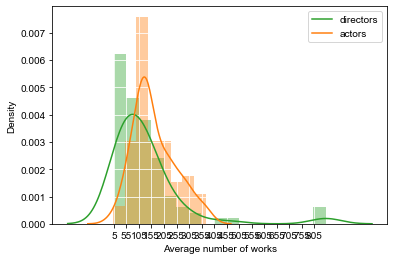

In [21]:
# plot works of directors and actors
sns.distplot(work_director, color=sns.color_palette()[2])
sns.distplot(work_actor, color=sns.color_palette()[1])
plt.xticks(range(int(min(work_director)), int(max(work_director)), 50))
plt.xlabel('Average number of works')
plt.grid(axis='y', color='white', linestyle='-')
plt.grid(axis='x', color='white', linestyle='-')
plt.legend(['directors', 'actors'])
plt.show()

/opt/anaconda3/envs/INT303/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


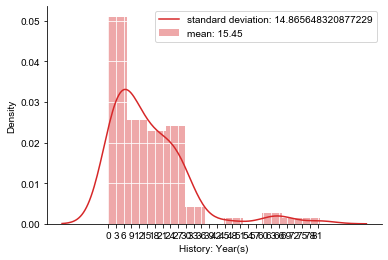

In [22]:
# plot history
sns.distplot(history, color=sns.color_palette()[3])
sns.despine()
plt.xticks(range(0, max(history)+1, 3))
plt.grid(axis='x', color='white', linestyle='-')
plt.grid(axis='y', color='white', linestyle='-')
plt.xlabel('History: Year(s)')
plt.legend(['standard deviation: ' + str(np.std(history)), 'mean: ' + str(np.mean(history))])
plt.show()

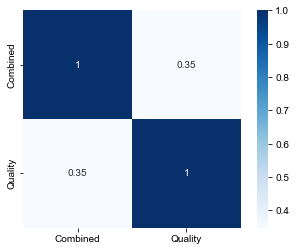

In [26]:
# correlation analysis
def score_genre(genre_to_check):
    genre_score = 0
    for i in range(len(count_genre['Genre'])):
        if count_genre['Genre'][i] == genre_to_check:
            genre_score = int(count_genre['Number'][i] / sum(count_genre['Number']) * 1000)
    return genre_score

def get_scores():
    genre_score_list = []
    for i in genre:
        score_row = sum([score_genre(x.strip()) for x in i.split(',')])
        genre_score_list.append(score_row)
    return genre_score_list

genre_score_list = get_scores()

data = pandas.DataFrame({'Combined': [genre_score_list[i] + work_director[i] +  work_actor[i] +  duration[i] + history[i] for i in range(len(genre_score_list))],
                    'Quality': [df['Rating'][i]*history[i] for i in range(len(history))]})
fig=sns.heatmap(data.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.show()